In [32]:
# bibliotecas a usar 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
#load data
data=pd.read_csv("C:/Users/marta/OneDrive/Documentos/ISAG/Data Mining II/forestfires.csv")

month_dummies=pd.get_dummies(data['month'],prefix='month_')
day_dummies=pd.get_dummies(data['day'],prefix='day_')

data=pd.concat([data,month_dummies,day_dummies], axis=1)
data=data.drop(['month','day'],axis=1)
#dataset = data.values



In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   X           517 non-null    int64  
 1   Y           517 non-null    int64  
 2   FFMC        517 non-null    float64
 3   DMC         517 non-null    float64
 4   DC          517 non-null    float64
 5   ISI         517 non-null    float64
 6   temp        517 non-null    float64
 7   RH          517 non-null    int64  
 8   wind        517 non-null    float64
 9   rain        517 non-null    float64
 10  area        517 non-null    float64
 11  month__apr  517 non-null    uint8  
 12  month__aug  517 non-null    uint8  
 13  month__dec  517 non-null    uint8  
 14  month__feb  517 non-null    uint8  
 15  month__jan  517 non-null    uint8  
 16  month__jul  517 non-null    uint8  
 17  month__jun  517 non-null    uint8  
 18  month__mar  517 non-null    uint8  
 19  month__may  517 non-null    u

In [24]:
data.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month__nov,month__oct,month__sep,day__fri,day__mon,day__sat,day__sun,day__thu,day__tue,day__wed
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,...,0.001934,0.029014,0.332689,0.164410,0.143133,0.162476,0.183752,0.117988,0.123791,0.104449
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,...,0.043980,0.168007,0.471632,0.371006,0.350548,0.369244,0.387657,0.322907,0.329662,0.306138
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [34]:

# Import `train_test_split` from `sklearn.model_selection`
import numpy as np
from sklearn.model_selection import train_test_split

# Specify the data 
y = data['area'].values
data=data.drop(['area'],axis=1)
X = data.values


In [26]:
X.shape

(517, 29)

In [35]:
#Data Cleaning and Preprocessing
#Classification
#Convert to Acres then Classify Size
'''
Class 1.A - one acre or less;
Class 2.B - more than one acre, but less than 10 acres;
Class 3.C - 10 acres or more, but less than 100 acres;
Class 4.D - 100 acres or more, but less than 300 acres;
Class 5.E - 300 acres or more, but less than 1,000 acres;
Class 6.F - 1,000 acres or more, but less than 5,000 acres;
'''
import numpy as np
import pandas as pd
for i in range(0, len(y)):
    y[i] = (y[i]*2.47)
    if y[i] < 1.0:
        y[i] = 1
    elif y[i] < 10.0:
        y[i] = 2
    elif y[i] < 100.0:
        y[i] = 3
    elif y[i] < 300.0:
        y[i] = 4
    elif y[i] < 1000.0:
        y[i] = 5
    elif y[i] < 5000.0:
        y[i] = 6
    else:
        y[i] = 7




In [36]:
'''Encoding For Classification'''
from keras.utils import np_utils
y = np_utils.to_categorical(y)
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# Feature Scaling to optimize
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [63]:
X_train

array([[-0.288472  , -1.09485913,  0.28028558, ..., -0.35835081,
        -0.37953171, -0.33198653],
       [-0.288472  , -0.26669645,  0.06165224, ..., -0.35835081,
        -0.37953171, -0.33198653],
       [-1.16128472,  0.56146622,  0.26346763, ..., -0.35835081,
         2.63482593, -0.33198653],
       ...,
       [-1.16128472, -1.9230218 ,  0.26346763, ..., -0.35835081,
         2.63482593, -0.33198653],
       [-1.16128472,  0.56146622,  0.04483429, ..., -0.35835081,
        -0.37953171, -0.33198653],
       [-1.16128472, -0.26669645,  0.71755226, ..., -0.35835081,
         2.63482593, -0.33198653]])

In [37]:
# define the keras model
import tensorflow 
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from keras import optimizers


model = Sequential()
model.add(layers.Dense(12, activation='relu', input_shape=(29,)))
model.add(layers.Dense(12, activation='relu'))
model.add(layers.Dense(7, activation = 'softmax'))



In [38]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
history=model.fit(X_train, y_train,epochs=50, batch_size=32, verbose=1, validation_data=(X_test, y_test))

Epoch 1/50
13/13 [==============================] - 0s 14ms/step - loss: 2.1192 - accuracy: 0.1237 - val_loss: 1.9401 - val_accuracy: 0.2308
Epoch 2/50
13/13 [==============================] - 0s 4ms/step - loss: 1.9100 - accuracy: 0.2250 - val_loss: 1.8022 - val_accuracy: 0.3365
Epoch 3/50
13/13 [==============================] - 0s 4ms/step - loss: 1.7277 - accuracy: 0.3696 - val_loss: 1.6991 - val_accuracy: 0.3462
Epoch 4/50
13/13 [==============================] - 0s 4ms/step - loss: 1.6653 - accuracy: 0.4185 - val_loss: 1.6215 - val_accuracy: 0.3942
Epoch 5/50
13/13 [==============================] - 0s 4ms/step - loss: 1.6469 - accuracy: 0.4163 - val_loss: 1.5575 - val_accuracy: 0.4327
Epoch 6/50
13/13 [==============================] - 0s 4ms/step - loss: 1.5186 - accuracy: 0.4666 - val_loss: 1.5039 - val_accuracy: 0.4327
Epoch 7/50
13/13 [==============================] - 0s 4ms/step - loss: 1.4535 - accuracy: 0.4964 - val_loss: 1.4594 - val_accuracy: 0.4615
Epoch 8/50
13/13 [=

In [39]:
#Modelo 2 - Dropout

from keras import optimizers
from keras.layers import Dropout

modeldrop = Sequential()
modeldrop.add(layers.Dense(24, activation='relu', input_shape=(29,)))
modeldrop.add(Dropout(0.2))
modeldrop.add(layers.Dense(64, activation='relu'))
modeldrop.add(Dropout(0.2))
modeldrop.add(layers.Dense(32, activation='relu'))
modeldrop.add(Dropout(0.2))
modeldrop.add(layers.Dense(7, activation = 'softmax'))
modeldrop.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
historydrop=modeldrop.fit(X_train, y_train,epochs=50, batch_size=32, verbose=1, validation_data=(X_test, y_test))


Epoch 1/50
13/13 [==============================] - 1s 15ms/step - loss: 2.2616 - accuracy: 0.0403 - val_loss: 1.8908 - val_accuracy: 0.2308
Epoch 2/50
13/13 [==============================] - 0s 4ms/step - loss: 1.8453 - accuracy: 0.2497 - val_loss: 1.6838 - val_accuracy: 0.4904
Epoch 3/50
13/13 [==============================] - 0s 4ms/step - loss: 1.6779 - accuracy: 0.4498 - val_loss: 1.5581 - val_accuracy: 0.4904
Epoch 4/50
13/13 [==============================] - 0s 4ms/step - loss: 1.6373 - accuracy: 0.4177 - val_loss: 1.4761 - val_accuracy: 0.4904
Epoch 5/50
13/13 [==============================] - 0s 4ms/step - loss: 1.5297 - accuracy: 0.4554 - val_loss: 1.4196 - val_accuracy: 0.4904
Epoch 6/50
13/13 [==============================] - 0s 4ms/step - loss: 1.4020 - accuracy: 0.4537 - val_loss: 1.3765 - val_accuracy: 0.4904
Epoch 7/50
13/13 [==============================] - 0s 4ms/step - loss: 1.3786 - accuracy: 0.4635 - val_loss: 1.3504 - val_accuracy: 0.4519
Epoch 8/50
13/13 [=

In [40]:
#Modelo 3 - Kernel Regularizador

from keras.layers import Dense
from keras.regularizers import l2

modelreg = Sequential()
modelreg.add(Dense(64, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
modelreg.add(layers.Dense(24, activation='relu'))
modelreg.add(layers.Dense(24, activation='relu'))
modelreg.add(layers.Dense(7, activation = 'softmax'))
modelreg.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
historyreg=modelreg.fit(X_train, y_train,epochs=50, batch_size=32, verbose=1, validation_data=(X_test, y_test))



Epoch 1/50
13/13 [==============================] - 1s 15ms/step - loss: 2.4004 - accuracy: 0.1501 - val_loss: 2.2392 - val_accuracy: 0.2308
Epoch 2/50
13/13 [==============================] - 0s 4ms/step - loss: 2.1110 - accuracy: 0.2872 - val_loss: 2.0505 - val_accuracy: 0.3558
Epoch 3/50
13/13 [==============================] - 0s 4ms/step - loss: 1.9192 - accuracy: 0.4048 - val_loss: 1.9138 - val_accuracy: 0.4423
Epoch 4/50
13/13 [==============================] - 0s 4ms/step - loss: 1.7707 - accuracy: 0.4598 - val_loss: 1.8090 - val_accuracy: 0.4519
Epoch 5/50
13/13 [==============================] - 0s 4ms/step - loss: 1.6689 - accuracy: 0.5233 - val_loss: 1.7387 - val_accuracy: 0.4615
Epoch 6/50
13/13 [==============================] - 0s 4ms/step - loss: 1.5895 - accuracy: 0.5296 - val_loss: 1.6904 - val_accuracy: 0.4615
Epoch 7/50
13/13 [==============================] - 0s 4ms/step - loss: 1.5380 - accuracy: 0.5234 - val_loss: 1.6473 - val_accuracy: 0.4808
Epoch 8/50
13/13 [=

In [17]:
y_train.shape[1]


7

In [41]:
X.shape

(517, 29)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


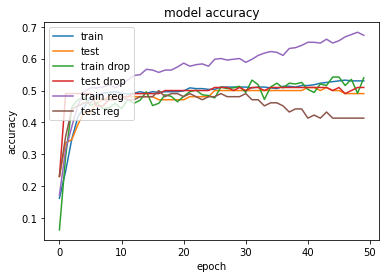

In [41]:

import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.plot(historydrop.history['accuracy'])
plt.plot(historydrop.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.plot(historyreg.history['accuracy'])
plt.plot(historyreg.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test','train drop', 'test drop','train reg', 'test reg'], loc='upper left')
plt.show()



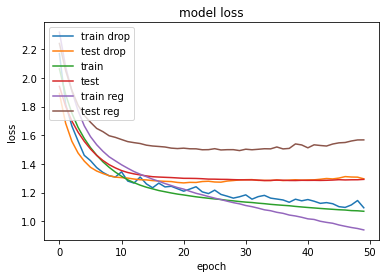

In [43]:
# summarize history for loss
plt.plot(historydrop.history['loss'])
plt.plot(historydrop.history['val_loss'])
plt.title('model loss drop')
plt.ylabel('loss drop')
plt.xlabel('epoch')
plt.legend(['train drop', 'test drop'], loc='upper left')
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# summarize history for loss
plt.plot(historyreg.history['loss'])
plt.plot(historyreg.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train drop', 'test drop','train', 'test','train reg', 'test reg'], loc='upper left')
plt.show()

